
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renommer le fichier TME1.ipynb pour SBAS_TME_1_NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via Moodle avant le prochain TME
</ul>
<br>
REMARQUE : Les fichiers seront aussi corrigés numériquement. Faites donc attention à <b> ne pas modifier la signature et le renvoi des fonctions! </b>
<br>
</div>

Nom etudiant 1 : Anton Christine 
<br>
Nom etudiant 2 : Nicolas Elise
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à TME1: <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Les lignes qui commencent avec “>” contiennent des commentaires (nom de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient soit un acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercice 1: Pour chaque position i = 0, ..., L − 1 de l' alignement et chaque acide aminé a ∈ A (trou compris), calculer le nombre d’occurences ni(a) et le poid ωi(a), où :
\begin{equation*}
n_{i}(a) = \textrm{nombre d'occurrences de l'acide aminé a dans la colonne i}
\end{equation*}

\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [12]:
import sys
import numpy as np
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21
#aa = ['A', 'B', 'C', '-']
#q = 4
#aa = ['A', 'G', 'C', 'T', '-']
#q = 5

In [13]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [14]:
#load DTrain File
def load_train(input_f):
    """Input 1 : a multiple sequence alignment (MSA) in FASTA format
    Output 1 : the MSA (see REMARK)
    Output 2 : the length of the aligned sequences (MSA length)
    Output 3 : the number of sequences in the MSA (MSA depth)
    
    REMARK : The MSA should be represented as an ordered collection of sequences.
    Meaning, the first sequence in the file must be the first sequence in the
    data structure. You can represent it as a list of lists of char, a list of 
    str, a numpy matrix, etc. Just be consistent throughout the whole TME1"""
    
    train_set=[]
    with open(input_f, 'r') as file:
        for line in file : 
            if not line.startswith ('>') : 
                train_set.append(line.strip())
    
    L = len(train_set[0])
    m = len(train_set)

    # Reshape train_set
    train_set = np.array([list(seq.ljust(L)) for seq in train_set])
   
    return train_set, L, m

In [15]:
train_set, L, m = load_train(input_dataset_f)
print("Training data (watch out, this is long):")
print(train_set)

print("MSA length", L)
print("MSA depth", m)

Training data (watch out, this is long):
[['-' 'A' 'L' ... 'F' 'P' 'V']
 ['K' 'A' 'I' ... 'F' 'P' 'V']
 ['K' 'A' 'L' ... 'F' 'P' 'V']
 ...
 ['R' 'A' 'L' ... 'F' 'P' '-']
 ['-' '-' '-' ... 'F' 'P' 'A']
 ['R' 'A' 'L' ... '-' '-' '-']]
MSA length 48
MSA depth 5643


In [16]:
#Computing wi(a)
def get_pwm(train_set, L, m, alphabet):
    """Input 1 : The MSA (see REMARK of the load_train function)
    Input 2 L : the MSA length = 48
    Input 3 m : the MSA depth = 5643
    Input 4 : the alphabet used (it must be an ordered collection of non-repeating characters)
    Output 1 : position-weight matrix of shape (q, L) where q is len(alphabet)"""
    
    # Initialisation 
    q = len(alphabet)     # nb of characters in alphabet
    pwm = np.zeros((q, L))
    n = np.zeros((q, L))
    
    # Compute wi for every column i of train_set for each aa
    for i, aa in enumerate(alphabet) :
        # Compute ni
        n[i] = np.sum(train_set==aa, axis=0)
        
    # Compute W
    pwm = (n+1)/(m+q)
    
    return pwm


In [17]:
PWM = get_pwm(train_set, L, m, aa)
print(PWM)

[[1.76553672e-04 7.25282486e-01 1.02401130e-02 ... 3.42514124e-02
  1.76553672e-04 2.38170904e-01]
 [1.76553672e-04 1.76553672e-04 1.94209040e-03 ... 7.59180791e-03
  1.76553672e-04 1.69491525e-02]
 [1.76553672e-04 1.76553672e-04 3.53107345e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 ...
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.78319209e-02
  1.76553672e-04 1.76553672e-04]
 [3.13206215e-01 1.55367232e-01 8.20974576e-02 ... 5.66737288e-02
  6.77966102e-02 3.53460452e-01]]


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [18]:
#Computing Si
def si_calculate (wi):
    """Input 1 : Weight vector (of length q) representing column i of the MSA
    Output 1 : Relative entropy of column i (L,)"""
    
    si = np.log2(q) + np.sum(wi*np.log2(wi))
    return si

In [30]:
#Make a vector Si of length L containing the relative entropy of each position (column) of the MSA
Si=[]
for i in range(L) : 
    Si.append(si_calculate(PWM[:,i]))
Si = np.array(Si)
print(Si)

[1.85476633 3.18077792 2.05319382 2.53568315 1.9140966  2.82157361
 0.73424974 1.99416979 0.79115378 0.6202211  1.18264986 1.45434222
 2.80863168 3.16855572 1.60729655 2.51440497 0.81070125 1.39964613
 3.22080975 2.45429088 1.04633148 2.29252912 0.59942831 2.29142322
 1.59356996 1.06695729 0.79152959 0.54565914 1.16188277 1.02144959
 1.76235378 4.17682738 1.96045244 0.77906727 2.57718029 1.05852036
 0.63617147 0.45471578 1.15729284 2.37264241 2.22108705 0.83146074
 0.77876262 3.87551396 1.28462265 2.20552991 3.98627283 2.0581654 ]


2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [63]:
#computing ai*
def get_aiStart(Si, PWM, naa):
    """
    parameters : 
        Input 1 : Relative entropy vector of length L
        Input 2 : position-weight matrix of shape (q, L)
        Input 3 : 0 < int < q+1, specifying the number of top-conserved residues
    Output 1 : list of length naa containing the amino acid type (char) of the 
    top-naa conserved columns"""
    Si_copy = Si.copy()
    top_aa={} # Dictionary with conserved positions as keys and conserved aa as values
    for i in range(naa) :
        maxi = np.argmax(Si_copy)
        top_aa[maxi] = aa[np.argmax(PWM[:,maxi])]
        Si_copy[maxi] = -np.inf
        
    return top_aa


In [64]:
print(get_aiStart(Si, PWM, 3))


{31: 'W', 46: 'P', 43: 'G'}


2.3) Tracer l’entropie rélative en fonction de chaque position i.

In [65]:
import matplotlib.pyplot as plt


In [66]:
#plot entropy
def plot_entropy(L:int, Si) :
    """
    For each of the L positions of the MSA, plot its entropy.
    
    parameters : 
        - L : int, the MSA length = 48
        - Si : np.ndarray (L,) containing the relative entropy of each position (column) of the MSA
    BONUS : highlight the top-naa conserved sites, and print the
    most abundant amino acid type on top of the naa identified positions
    """
    plt.figure()
    x = np.arange(L)
    plt.scatter(x, Si)

    # Labels and title
    plt.xlabel("Position of MSA")
    plt.ylabel("Relative entropy")
    plt.title("Relative entropy for each position of the MSA")
    plt.show()
    plt.savefig('entropy.png', dpi=300)
    return

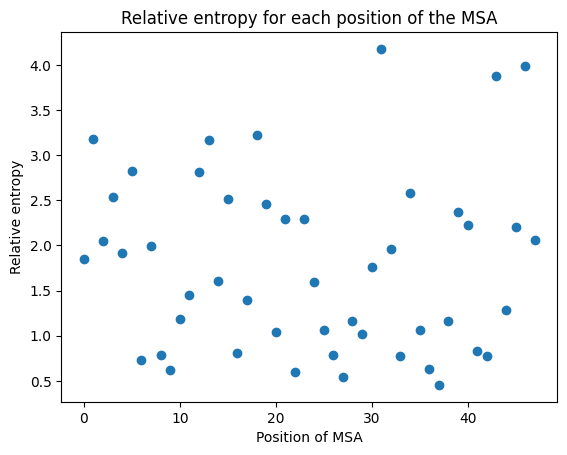

<Figure size 640x480 with 0 Axes>

In [67]:
# Test plot entropy
plot_entropy(L, Si)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [68]:
#computing f0
def f0_calcule(PWM):
    """
    modèle nul = modèle random (pas de séquence consensus particulière)
    parameters : 
        PWM : position-weight matrix of shape (q,L)
    returns : 
        Output 1 : vector of size q containing the null model 
    """
    
    # Initialisation
    q, L = PWM.shape
    f_0 = 1/L*np.sum(PWM, axis=1)
    
    return f_0

In [69]:
# Test f0_calcule
f_0 = f0_calcule(PWM)
print (f_0)

[0.05880709 0.00751089 0.08008916 0.08491496 0.04194253 0.09048008
 0.01268244 0.05049067 0.05113804 0.07445048 0.01191369 0.03564545
 0.03793329 0.03431026 0.04506165 0.04843824 0.04072505 0.05916019
 0.0365981  0.03855491 0.05915284]


Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une séquence de taille L.

In [70]:
#computing log-likehood
def loglikehood(seq, PWM, f_0, L):
    """
    parameters : 
        seq : sequence of which you want to calculate the log-likelihood
        PWM : position-weight matrix of shape (q,L)
        f_0 : null model vector of shape (q,)
        L : MSA length
    returns : 
        LL : log-likelihood of the sequence seq
    """
    ll=0
    # q = longueur alphabet = 21
    # L = 48
    for i in range(L) : 
        pos = aa.index(seq[i])
        ll+=np.log2(PWM[pos][i]/f_0[pos])
    
    return ll

In [71]:
# Test loglikelihood # Test the log-likelihood on the sequences of the data set
LL = np.zeros(m)
for i, seq in enumerate(train_set):
    LL[i] = loglikehood(seq, PWM, f_0, L)
print(LL)

[ 87.8394997   70.85193579  67.31903115  67.31903115  56.93597548
  56.93597548  69.43184777  72.58226379  72.58226379  72.58226379
  65.67529827  67.60048449  67.60048449  67.60048449  63.7231925
  69.2199044   70.94969445  70.94969445  66.37580559  66.37580559
  66.37580559  66.37580559  66.37580559  66.37580559  66.37580559
  55.67862887  65.97390273  71.91060697  67.91286837  79.78459861
  79.78459861  65.36233256  71.65553539  81.45828958  75.48540551
  75.03823491  76.47914583  76.47914583  76.47914583  76.3975208
  76.3975208   74.77368787  75.74553881  75.74553881  75.74553881
  77.7179157   79.15056679  79.15056679  82.49890654  81.30494086
  90.87255305  85.96060368  86.65964765  78.05080374  81.22457818
  80.16926141  78.0267968   82.10907503  86.58791207  40.11711239
  48.47848203  48.38545726 100.70479995 100.70479995  80.04052017
  85.19771006  75.06247936  75.06247936  73.1937009   85.51569792
  82.42969839  96.57521892  88.10171596  89.9345762   89.9345762
  85.22049872

4.2: Faites une fonction qui etant donné une séquence de taille supérieur à k génère toutes les sous-séquences de taille k. Avec cette fonction, trouvez toutes les sous-séquences de taille L de la séquence en testseq.txt

In [72]:
#computing sliding_window 
def sliding_window (seq, k):
    """
    parameters : 
        seq : sequence of length > k
        k : window length (int)
    returns : 
        Output 1 : list of windows of length k generated from sequence seq
    """
    windows = []
    for start in range(len(seq)-k) : 
        windows.append(seq[start:start+k])
    
    return np.array(windows)

In [80]:
# Test sliding_window
# Find all subsequences of length L from the sequence in testseq.txt

# Transform testseq.txt in np.ndarray
test_set = load_train(input_sequence_f)

# Get every sub-sequence of size k
k = 10 # chose size of k
windows_test_set = np.array([])
for test_seq in test_set :
    window = sliding_window(seq, k)
    windows_test_set = np.concatenate(np.array(windows_test_set), window)
windows_test_set = np.array(windows_test_set)
print(windows_test_set)


TypeError: only integer scalar arrays can be converted to a scalar index

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvées en 4.2 et tracer un graphique de log-vraisemblance, avec en abscisse la position initiale de la sous-sequence.

In [75]:
#computing log-likelihood
def likelihoodAllSousSeq(subseqs, PWM, f_0, k):
    """
    parameters : 
        subseqs : list of all subsequences of length k
        PWM : position-weight matrix of length shape (q,k)
        f_0 : null model vector of length k
        k : length of each subsequence

    returns : 
        lhs : log-likelihood vector of length len(subseqs) - k + 1
    
    REMARK : The length of the subsequences must match the
    number of columns in the PWM and the length of the null model!
    """
    n_subseqs = len(subseqs)
    lhs = np.zeros(n_subseqs)
    for i, seq in enumerate(subseqs) : 
        lhs[i] = loglikehood(seq, PWM, f_0, k)
    
    return lhs


def plot_likelihood(lhs):
    """Input 1 : log-likelihood vector"""
    
    plt.savefig('likelihood.png', dpi=300)
    return


In [ ]:
# test likelihoodAllSousSeq

PWM_subseq = get_pwm(windows_test_set, k, )
#plotting log-likelihood for each initial position
